In [1]:
import deap
from functools import partial
from deap import base, creator, tools, algorithms
import random
import pandas as pd
import numpy as np
from deap import base, creator, tools, algorithms
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import _tree

In [2]:
df=pd.read_csv('C:/Users/Gabriel/Pasta/Machine Learning/BINÁRIO_HRV.csv')

In [3]:
df

,CLASSE,IAH,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
0,NORMAL,3.07,0.03,87,35,1.660000,69.600000,25.257657,49.5922,4.0768,...,-11.9732,10.4526,46.6220,47.8699,-0.2132,17.2253,68.7786,13.9962,1.0,0.0
1,NORMAL,1.93,0.00,92,50,1.590000,98.700000,39.041177,48.4985,6.3788,...,-6.3287,6.1144,49.2434,48.9933,-0.1273,24.8110,60.5646,14.6244,1.0,0.0
2,NORMAL,0.40,0.00,92,27,1.800000,91.000000,28.086420,51.0391,14.4829,...,-13.4549,14.9428,52.3657,57.2754,2.4017,27.1533,51.4026,21.4442,0.0,1.0
3,NORMAL,3.65,1.37,41,61,1.590000,103.700000,41.018947,60.8169,5.6235,...,-14.5812,14.4796,50.0457,50.2848,0.0960,11.2946,58.4855,30.2198,1.0,0.0
4,NORMAL,1.15,0.07,88,26,1.649234,59.700000,21.948760,47.7805,1.4780,...,-29.3785,35.4046,54.5368,56.3937,1.4414,12.7135,79.9516,7.3349,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,APNEICO,117.50,34.30,69,63,1.620000,89.500000,34.103033,54.1595,13.1081,...,-11.6846,10.8219,47.8445,48.0653,-0.2136,31.9158,46.3412,21.7430,1.0,0.0
287,APNEICO,72.00,68.40,67,64,1.640000,127.000000,47.218917,64.2736,1.0004,...,-5.2141,7.1196,57.4381,57.5743,1.4235,9.6522,61.7281,28.6197,1.0,0.0
288,APNEICO,33.80,1.80,82,51,1.650000,94.200000,34.600551,48.8423,9.6049,...,-19.3183,21.7097,52.3061,56.6817,2.0795,24.6303,59.7656,15.6041,0.0,1.0
289,APNEICO,34.30,4.60,83,59,1.649234,89.262007,32.817260,62.6354,5.1821,...,-3.5383,4.1281,52.1756,53.5385,0.7252,21.7171,52.3949,25.8880,0.0,1.0


In [4]:
#Separando conjunto de teste e de treino
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

In [5]:
train_set.iloc[:, 2:42]

,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,W1,W2,...,ATTEN,PHASEEN,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V
258,23.60,75,67,1.61,76.0,29.319856,75.0727,4.2549,11.3053,39.4062,...,2.3475,0.6924,-1.2289,1.3699,51.0043,51.3277,0.2126,23.9461,42.7151,33.3388
86,14.40,81,51,1.52,48.0,20.775623,69.9003,1.7170,10.4227,64.2845,...,1.4629,0.8812,-7.1137,6.5278,47.4961,46.7781,-0.5562,5.5659,56.1571,38.2771
229,10.80,77,70,1.64,69.0,25.654372,50.9938,12.7780,34.7683,39.3050,...,2.6883,0.9105,-9.6844,9.9350,51.1953,50.8643,0.1930,31.9211,52.4566,15.6223
92,0.20,87,36,1.69,74.0,25.909457,54.0109,3.0068,41.3305,46.3030,...,1.9035,0.9189,-11.9485,10.7005,48.5700,51.0898,0.2328,16.2400,69.8136,13.9465
97,1.40,83,27,1.55,70.0,29.136316,50.3281,5.6408,50.0402,32.0461,...,2.3812,0.9162,-6.2342,8.9840,51.3459,52.4776,0.4417,29.3564,58.4494,12.1942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,18.39,49,32,1.60,123.7,48.320312,52.5720,8.5143,39.1033,38.5719,...,2.4293,0.9233,-9.0357,8.4255,48.2910,49.9403,-0.0504,25.6497,54.3417,20.0087
71,18.70,73,56,1.56,85.0,34.927679,61.2185,3.0387,20.9251,65.3840,...,1.6233,0.9141,-11.6971,11.4989,49.8138,51.2127,0.4347,9.1912,67.6111,23.1977
106,0.70,79,47,1.48,70.0,31.957633,58.2807,2.5312,33.7759,50.0790,...,1.9538,0.9216,-7.9992,7.7740,52.0880,53.6257,0.7734,13.8376,66.4834,19.6790
270,99.70,53,40,1.85,188.0,54.930606,61.2457,4.1517,27.5211,48.8306,...,2.0666,0.9033,-5.0520,5.8209,52.2840,52.9548,0.4492,16.9553,61.9908,21.0539


In [6]:
from sklearn.experimental import enable_iterative_imputer
from imblearn.over_sampling import SMOTE
#Realiza o over-sampling
smote = SMOTE(random_state=7)
from sklearn.impute import IterativeImputer as imputer
X_T, y_T = smote.fit_resample(train_set.iloc[:, 2:42], train_set['CLASSE'],)
from collections import Counter
print(y_T.value_counts())

CLASSE
APNEICO    129
NORMAL     129
Name: count, dtype: int64


In [7]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=7)
RF.fit(X_T,y_T)

RandomForestClassifier(random_state=7)

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_t = test_set['CLASSE'].copy()
X_t = test_set.iloc[:, 2:42].copy()
print(y_t.value_counts())
predict=RF.predict(X_t)
accuracy_score(predict,y_t)

CLASSE
APNEICO    52
NORMAL     36
Name: count, dtype: int64


0.7272727272727273

In [9]:
print(predict)

['APNEICO' 'APNEICO' 'NORMAL' 'APNEICO' 'APNEICO' 'APNEICO' 'APNEICO'
 'APNEICO' 'NORMAL' 'APNEICO' 'NORMAL' 'APNEICO' 'NORMAL' 'APNEICO'
 'APNEICO' 'NORMAL' 'NORMAL' 'NORMAL' 'APNEICO' 'APNEICO' 'APNEICO'
 'APNEICO' 'APNEICO' 'APNEICO' 'NORMAL' 'NORMAL' 'APNEICO' 'APNEICO'
 'APNEICO' 'NORMAL' 'NORMAL' 'APNEICO' 'APNEICO' 'APNEICO' 'APNEICO'
 'APNEICO' 'APNEICO' 'NORMAL' 'APNEICO' 'NORMAL' 'NORMAL' 'NORMAL'
 'APNEICO' 'APNEICO' 'APNEICO' 'NORMAL' 'NORMAL' 'NORMAL' 'APNEICO'
 'NORMAL' 'APNEICO' 'NORMAL' 'NORMAL' 'APNEICO' 'NORMAL' 'APNEICO'
 'NORMAL' 'NORMAL' 'NORMAL' 'APNEICO' 'APNEICO' 'APNEICO' 'NORMAL'
 'APNEICO' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'APNEICO' 'NORMAL'
 'NORMAL' 'NORMAL' 'NORMAL' 'APNEICO' 'NORMAL' 'APNEICO' 'APNEICO'
 'APNEICO' 'APNEICO' 'NORMAL' 'APNEICO' 'APNEICO' 'APNEICO' 'NORMAL'
 'APNEICO' 'NORMAL' 'NORMAL']


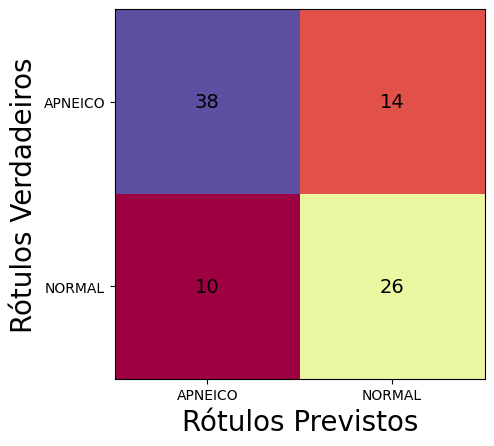

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

unique_labels = np.unique(y_t)
conf_matrix = confusion_matrix(y_t, predict, labels=unique_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_labels)
disp.plot(cmap="Spectral", colorbar=False, values_format='d')
for text in disp.im_.axes.texts:
    text.set_color('black')
    text.set_fontsize(14)
plt.xlabel('Rótulos Previstos', fontsize=20)
plt.ylabel('Rótulos Verdadeiros', fontsize=20)
plt.show()

In [11]:
#Converter as linhas do DataFrame (excluindo a classe) em listas de características
colunas_features = X_t.columns
individuos_iniciais = X_t[colunas_features].values.tolist()
classes_iniciais = y_t.tolist()

#Cria a classe de aptidão e o indivíduo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximização
creator.create("Individual", list, fitness=creator.FitnessMax)

In [12]:
print(classes_iniciais)

['NORMAL', 'APNEICO', 'NORMAL', 'APNEICO', 'APNEICO', 'APNEICO', 'APNEICO', 'APNEICO', 'NORMAL', 'NORMAL', 'APNEICO', 'APNEICO', 'NORMAL', 'APNEICO', 'APNEICO', 'NORMAL', 'NORMAL', 'NORMAL', 'APNEICO', 'APNEICO', 'APNEICO', 'APNEICO', 'APNEICO', 'NORMAL', 'NORMAL', 'APNEICO', 'APNEICO', 'NORMAL', 'NORMAL', 'APNEICO', 'NORMAL', 'NORMAL', 'APNEICO', 'APNEICO', 'NORMAL', 'APNEICO', 'APNEICO', 'APNEICO', 'APNEICO', 'NORMAL', 'APNEICO', 'NORMAL', 'APNEICO', 'APNEICO', 'APNEICO', 'NORMAL', 'NORMAL', 'NORMAL', 'APNEICO', 'APNEICO', 'APNEICO', 'NORMAL', 'NORMAL', 'APNEICO', 'APNEICO', 'APNEICO', 'APNEICO', 'APNEICO', 'NORMAL', 'APNEICO', 'APNEICO', 'APNEICO', 'NORMAL', 'NORMAL', 'APNEICO', 'APNEICO', 'NORMAL', 'NORMAL', 'APNEICO', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'APNEICO', 'NORMAL', 'NORMAL', 'APNEICO', 'APNEICO', 'APNEICO', 'NORMAL', 'APNEICO', 'APNEICO', 'APNEICO', 'APNEICO', 'APNEICO', 'APNEICO', 'NORMAL']


In [13]:
continuous = colunas_features
discrete=[]
class_name = 'CLASSE'
idx_features = colunas_features

min_vals = X_t[continuous].min().values
max_vals = X_t[continuous].max().values

In [14]:
def distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals):
    # Converte dicionários em arrays
    u = np.array(list(x0d.values()))
    v = np.array(list(x1d.values()))

    # Normaliza os vetores (evita divisão por zero)
    denom = max_vals - min_vals
    denom[denom == 0] = 1  # Garante que não haja divisão por zero
    u_norm = (u - min_vals) / denom
    v_norm = (v - min_vals) / denom

    # Calcula o numerador (distância quadrada entre vetores normalizados)
    numerator = np.sum((u_norm - v_norm) ** 2)

    # Calcula o denominador (norma quadrada normalizada)
    denominator = np.sum(u_norm ** 2) + np.sum(v_norm ** 2)

    return numerator / denominator if denominator != 0 else 0.0

In [15]:
#Função de fitness: similar_same_outcome
def fitness_sso(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, x1):
    #Converter listas para dicionários com nomes das features
    x0d = {idx_features[i]: val for i, val in enumerate(x0)}
    x1d = {idx_features[i]: val for i, val in enumerate(x1)}
    
    #Similaridade entre as instâncias
    sim_ratio = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
    record_similarity = 0.0 if sim_ratio >= eta else sim_ratio

    #Previsão com DataFrame nomeado (evita warning)
    x0_df = pd.DataFrame([x0], columns=idx_features)
    x1_df = pd.DataFrame([x1], columns=idx_features)
    y0 = bb.predict(x0_df)[0]
    y1 = bb.predict(x1_df)[0]
    
    #Similaridade de saída
    target_similarity = 1.0 if y0 == y1 else 0.0

    # Avaliação final
    evaluation = float(alpha1) * float(record_similarity) + float(alpha2) * float(target_similarity)
    return evaluation,

#Função de fitness: similar_different_outcome
def fitness_sdo(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, x1):
    #Converter listas para dicionários com nomes das features
    x0d = {idx_features[i]: val for i, val in enumerate(x0)}
    x1d = {idx_features[i]: val for i, val in enumerate(x1)}

    # Similaridade entre as instâncias
    sim_ratio = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
    record_similarity = 0.0 if sim_ratio >= eta else sim_ratio

    #Previsão com DataFrame nomeado (evita o aviso de que as previsõe dentro do AG são feitas sem as labels)
    x0_df = pd.DataFrame([x0], columns=idx_features)
    x1_df = pd.DataFrame([x1], columns=idx_features)
    y0 = bb.predict(x0_df)[0]
    y1 = bb.predict(x1_df)[0]

    # Similaridade de saída invertida
    target_similarity = 1.0 if y0 != y1 else 0.0

    # Avaliação final
    evaluation = float(alpha1) * float(record_similarity) + float(alpha2) * target_similarity
    return evaluation,

In [16]:
#Reprodução, crossover do tipo aritmético
def Crossover_func(ind1, ind2, alpha=0.5, cx_prob=0.5):
    if random.random() < 1:
        for i, (x1, x2) in enumerate(zip(ind1[:-1], ind2[:-1])):  # Ignorar a última coluna (classe)
            gamma = (1. + 2. * alpha) * random.random() - alpha
            ind1[i] = (1. - gamma) * x1 + gamma * x2
            ind2[i] = gamma * x1 + (1. - gamma) * x2
        
        # Manter a classe original dos indivíduos sem alterar
        ind1[-1] = ind1[-1]  # A classe de ind1 permanece inalterada
        ind2[-1] = ind2[-1]  # A classe de ind2 permanece inalterada
        
        return ind1, ind2
    else:
        return ind1, ind2

In [17]:
#Mutação
#mu é a média da distribuição gaussiana e sigma o desvio padrão
def mutGaussianWithoutClass(individual, mu, sigma, mutpb, min_vals=min_vals, max_vals=max_vals):
    # Aplica mutação apenas às características numéricas, ignorando a última posição (classe)
    for i in range(len(individual) - 1):  # Ignorar a última coluna (classe)
        if random.random() < 1:
            individual[i] += random.gauss(mu, sigma)  # Aplica a mutação nas características numéricas
            
            # Aplica o clipping se min_vals e max_vals forem fornecidos
            if min_vals is not None and max_vals is not None:
                individual[i] = np.clip(individual[i], min_vals[i], max_vals[i])

    return individual,  # Retorna o indivíduo como tupla

In [18]:
def get_decision_path(ClassificadorDT, xi_df, feature_names):
    """
    Retorna um dicionário com os nós percorridos e as decisões tomadas.
    """
    node_indicator = ClassificadorDT.decision_path(xi_df)
    leaf_id = ClassificadorDT.apply(xi_df)[0]  # Nó final

    feature = ClassificadorDT.tree_.feature
    threshold = ClassificadorDT.tree_.threshold

    decision_dict = {}
    xi_array = xi_df.values  # para acessar os valores numéricos

    for node_id in node_indicator.indices:
        if leaf_id == node_id:
            decision_dict[f"Nó {node_id}"] = "Folha"
        else:
            feature_index = feature[node_id]
            threshold_value = threshold[node_id]
            feature_name = feature_names[feature_index]
            sample_value = xi_array[0, feature_index]  # aqui pode usar vírgula

            decision = f"{feature_name} <= {threshold_value}" if sample_value <= threshold_value else f"{feature_name} > {threshold_value}"
            decision_dict[f"Nó {node_id}"] = decision

    return decision_dict

In [19]:
import time  
tempo_total_inicio = time.time()  #Início do tempo total

In [21]:
for idx in range(len(individuos_iniciais)):
    tempo_inicio = time.time()  #Início do tempo da iteração
    def ordinal_pt(n):
        sufixos = ["primeira", "segunda", "terceira", "quarta", "quinta", "sexta",
                   "sétima", "oitava", "nona", "décima"]
        if 0 <= n < len(sufixos):
            return sufixos[n]
        else:
            return f"{n+1}ª"

    print(f"\nGerando os Dados para a {ordinal_pt(idx)} Explicação")
    
    def create_individual():
        return individuos_iniciais[idx] + [classes_iniciais[idx]]  
    
    #Criando indivíduos que estão próximos e resultam numa mesma classe SSO
    individuo_inicial = individuos_iniciais[idx] 
    xi=individuo_inicial
    
    print("\nIndivíduo sendo explicado", xi)
    def evaluate(individual):
        #Parâmetros da função de fitness 
        alpha1 = 0.5
        alpha2 = 0.5
        eta = 0.6
        discrete = []
        continuous = colunas_features
        class_name = 'CLASSE'
        idx_features = colunas_features
        #Avaliar usando a função de fitness 
        return fitness_sso(individual[:40], RF, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, xi)
    
    # Configuração da toolbox
    toolbox = base.Toolbox()
    toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("mate", Crossover_func, alpha=0.5, cx_prob=0.5)
    toolbox.register("mutate", mutGaussianWithoutClass, mu=0, sigma=1, mutpb=0.3)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", evaluate)  
    
    #População inicial
    population = toolbox.population(n=350)
    
    # for i, ind in enumerate(population):
    #     print(f"Indivíduo {i+1}: {ind}")
    
    #Parâmetros do algoritmo genético
    
    ngen = 10  #Número de gerações
    cxpb, mutpb = 0.5, 0.3  #Probabilidades de cruzamento e mutação
    
    #eaSimple Executa o algoritmo genético
    result, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)
    
    #Exibe o melhor resultado
    best_individual = tools.selBest(population, 1)[0]
    print(f"\nMelhor indivíduo SSO: {best_individual}, Fitness: {best_individual.fitness.values}")
    
    #Filtrar e armazenar os novos indivíduos gerados
    novos_individuos_SSO = [ind[:40] for ind in population]  # Pegando apenas as características
    
    #print(f"Novos indivíduos gerados: {novos_individuos_SSO}")

    #Criando indivíduos que estão próximos mas resultam em um classe diferente SDO
    individuo_inicial = individuos_iniciais[idx] 
    xi=individuo_inicial
    
    def evaluate(individual):
        # Parâmetros da função de fitness (exemplo)
        alpha1 = 0.5
        alpha2 = 0.5
        eta = 0.3
        discrete = []
        continuous = colunas_features
        class_name = 'CLASSE'
        idx_features = colunas_features
        # Avaliar usando a função de fitness fornecida
        return fitness_sdo(individual[:40], RF, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, xi)
    
    # Configuração da toolbox
    toolbox = base.Toolbox()
    toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("mate", Crossover_func, alpha=0.5, cx_prob=0.5)
    toolbox.register("mutate", mutGaussianWithoutClass, mu=0, sigma=1, mutpb=0.3)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", evaluate)  # Passar o indivíduo inicial aqui
    
    # Criar a população inicial
    population = toolbox.population(n=500)
    
    # Parâmetros do algoritmo
    ngen = 10 # Número de gerações
    cxpb, mutpb = 0.5, 0.3 # Dentro do eaSimple
    
    # Executa o algoritmo genético
    result, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)
    
    # Exibir o melhor resultado
    best_individual = tools.selBest(population, 1)[0]
    print(f"\nMelhor indivíduo SDO: {best_individual[:-1]}, Fitness: {best_individual.fitness.values}")
    
    # Filtrar e armazenar os novos indivíduos gerados
    novos_individuos_SDO= [ind[:40] for ind in population]  # Pegando apenas as características
    
    #print(f"Novos indivíduos gerados: {novos_individuos_SDO}")

    SSO=pd.DataFrame(novos_individuos_SSO)
    SDO=pd.DataFrame(novos_individuos_SDO)
    XSSO=SSO.iloc[:, :40].values
    XSDO=SDO.iloc[:, :].values

    XTOTAL = pd.concat([SSO, SDO], ignore_index=True)
    XTOTAL_df = pd.DataFrame(XTOTAL.to_numpy(), columns=X_t.columns)

    ytotal= RF.predict(XTOTAL_df)
    pd.Series(ytotal).value_counts()

    y_series = pd.Series(ytotal, name="label")
    dfb= XTOTAL_df.copy()
    dfb["label"] = y_series
    
    # Descobre o tamanho da menor classe
    min_count = y_series.value_counts().min()
    
    # Balanceia o conjunto
    balanced_df = dfb.groupby("label").sample(n=min_count, random_state=40)
    
    #print("\nConjunto de Dados Artificiais Gerados", balanced_df)
    
    # Separa novamente X e y
    Xb = balanced_df.drop(columns="label")
    yb = balanced_df["label"] 

    ClassificadorDT = DecisionTreeClassifier(max_depth=15, random_state=42)
    ClassificadorDT.fit(Xb, yb)
    
    print(f"\nGerando a {ordinal_pt(idx)} Explicação")
    
    xiarray = np.array(xi).reshape(1, -1)  
    xi_df = pd.DataFrame(xiarray, columns=colunas_features)
    
    Explicando=ClassificadorDT.predict(xi_df)
    print("\nPor que o indivíduo foi classificado como:", Explicando, '?')

    node_indicator = ClassificadorDT.decision_path(xi_df)
    node_index = node_indicator.indices
    print("\nPorque o seguintes nós foram percorridos para essa amostra:")
    
    thresholds = ClassificadorDT.tree_.threshold
    features = ClassificadorDT.tree_.feature
    children_left = ClassificadorDT.tree_.children_left
    children_right = ClassificadorDT.tree_.children_right
    
    explicacoes_nos = []

    for node_id in node_index:
        f_index = features[node_id]      # índice da feature usada no nó
        thresh = thresholds[node_id]     # limiar do nó
    
        if f_index >= 0:
            val = xiarray[0][f_index]
            feature_name = xi_df.columns[f_index]
            cond = "SATISFEITA" if val <= thresh else "NÃO SATISFEITA"
            explicacao = f"Nó {node_id}: {feature_name} = {val:.3f}, condição testada: {feature_name} <= {thresh:.3f} → {cond}"
        else:
            explicacao = f"Nó {node_id}: folha alcançada, o indivíduo é: {Explicando}"
    
        print(explicacao)
        explicacoes_nos.append(explicacao)
            
    feature_names_exp = colunas_features
    Explicacao = get_decision_path(ClassificadorDT, xi_df, feature_names_exp)
    print(f"\nExplicação para a {ordinal_pt(idx)} instância de X_t", Explicacao)

    # Salva explicação dos nós percorridos
    with open(f"exp_premissas/explicacao_nos_amostra_{idx}.txt", "w", encoding="utf-8") as f_nos:
        f_nos.write("\n".join(explicacoes_nos))
    
    # Salva explicação do caminho da árvore
    with open(f"exp_final/explicacao_final_amostra_{idx}.txt", "w", encoding="utf-8") as f_final:
        for chave, valor in Explicacao.items():
            f_final.write(f"{chave}: {valor}\n")
    
    tempo_fim = time.time()  # Fim do tempo da iteração
    print(f"\n⏱️ Tempo de execução da {ordinal_pt(idx)} explicação: {tempo_fim - tempo_inicio:.2f} segundos")

tempo_total_fim = time.time()  # Fim do tempo total
print(f"\n✅ Tempo total de execução: {tempo_total_fim - tempo_total_inicio:.2f} segundos")


Gerando os Dados para a primeira Explicação

Indivíduo sendo explicado [0.0, 90.0, 42.0, 1.61, 108.0, 41.66505921839435, 54.4808, 6.0207, 38.3577, 41.824, 13.7975, 56.7664, 36.2767, 1.4186, 5.5382, 445.0917, 135.8711, 57.4757, 66.9582, 33.0418, 2.2287, 743.2054, 35.2199, 11.7962, 1.4613, 1.522, 1.0348, 0.5647, 2.4223, 3.6904, 2.4321, 0.9088, -6.1145, 6.4501, 51.3422, 52.2414, 0.4297, 27.6741, 59.3422, 12.9837]

Melhor indivíduo SSO: [np.float64(0.5931098954666205), np.float64(89.78997064001008), np.float64(43.649925197586676), np.float64(1.7729287272034018), np.float64(109.12245859875432), np.float64(41.31954844731298), np.float64(55.863753783087795), np.float64(4.708611179213826), np.float64(38.31901321934169), np.float64(38.699983700652595), np.float64(7.192491906789538), np.float64(56.73780218214243), np.float64(35.24088536257642), np.float64(2.7114224059001795), np.float64(6.99661325245956), np.float64(444.8047372079472), np.float64(136.2530543029925), np.float64(57.13773902772061

# ACERTOS (65)

In [22]:
X_t88 = X_t.reset_index(drop=True)
X_t88

,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,W1,W2,...,ATTEN,PHASEEN,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V
0,0.00,90,42,1.610000,108.000000,41.665059,54.4808,6.0207,38.3577,41.8240,...,2.4321,0.9088,-6.1145,6.4501,51.3422,52.2414,0.4297,27.6741,59.3422,12.9837
1,2.40,85,54,1.560000,77.300000,31.763642,59.7655,5.2408,30.7866,43.3670,...,2.3805,0.9062,-6.0373,6.1587,50.8726,51.4137,0.4595,23.5269,56.0213,20.4518
2,2.00,82,53,1.640000,65.000000,24.167162,58.2716,5.4463,29.4046,50.0357,...,2.0785,0.9211,-7.5442,7.9502,51.4894,51.6891,0.4140,17.6156,60.0317,22.3527
3,9.20,70,65,1.650000,122.000000,44.811754,59.9173,1.7589,28.2187,58.5742,...,1.6449,0.9062,-9.5779,6.8927,48.0135,48.4821,-0.1614,9.4193,68.5894,21.9913
4,0.00,91,66,1.649234,89.262007,32.817260,47.7825,24.3318,26.6360,30.5093,...,3.2938,0.8534,-7.1254,10.2476,57.5344,61.9283,3.2136,44.2501,35.7581,19.9918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,57.50,76,50,1.650000,77.000000,28.282828,56.8099,4.1040,33.3440,50.5588,...,1.9252,0.9079,-13.5336,12.5032,48.3607,48.9202,-0.0542,15.4449,62.7220,21.8331
84,0.66,77,38,1.710000,112.000000,38.302384,58.8936,1.8790,22.8335,72.0267,...,1.3269,0.9037,-12.1727,10.6368,46.8407,47.1754,-0.4222,4.8753,73.8015,21.3232
85,9.20,79,59,1.650000,99.000000,36.363636,54.7404,4.8646,36.4994,48.0820,...,1.9624,0.9140,-12.1631,10.9402,47.5235,47.4313,-0.5209,17.0570,65.1593,17.7837
86,0.00,89,71,1.550000,68.000000,28.303850,49.7488,12.1526,40.9029,32.5342,...,2.8252,0.9049,-6.2331,9.2372,50.1037,50.3292,0.1274,36.9561,48.3929,14.6509


In [23]:
y_t88 = y_t.reset_index(drop=True)
y_t88

0      NORMAL
1     APNEICO
2      NORMAL
3     APNEICO
4     APNEICO
       ...   
83    APNEICO
84    APNEICO
85    APNEICO
86    APNEICO
87     NORMAL
Name: CLASSE, Length: 88, dtype: object

In [24]:
y_series = pd.Series(y_t88, index=X_t88.index)  
y_pred_series = pd.Series(predict, index=X_t88.index)  

# Criando uma máscara de erro alinhada com o índice de X
mask_acertos = y_series == y_pred_series  

# Selecionando as instâncias mal classificadas
df_acertos = X_t88.loc[mask_acertos].copy()  

# Adicionando as classes real e prevista ao DataFrame de erros
df_acertos['Classe_Real'] = y_series[mask_acertos].values
df_acertos['Classe_Prevista'] = y_pred_series[mask_acertos].values

print(df_acertos.shape)
df_acertos

(64, 42)


,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,W1,W2,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,Classe_Real,Classe_Prevista
1,2.40,85,54,1.560000,77.300000,31.763642,59.7655,5.2408,30.7866,43.3670,...,-6.0373,6.1587,50.8726,51.4137,0.4595,23.5269,56.0213,20.4518,APNEICO,APNEICO
2,2.00,82,53,1.640000,65.000000,24.167162,58.2716,5.4463,29.4046,50.0357,...,-7.5442,7.9502,51.4894,51.6891,0.4140,17.6156,60.0317,22.3527,NORMAL,NORMAL
3,9.20,70,65,1.650000,122.000000,44.811754,59.9173,1.7589,28.2187,58.5742,...,-9.5779,6.8927,48.0135,48.4821,-0.1614,9.4193,68.5894,21.9913,APNEICO,APNEICO
4,0.00,91,66,1.649234,89.262007,32.817260,47.7825,24.3318,26.6360,30.5093,...,-7.1254,10.2476,57.5344,61.9283,3.2136,44.2501,35.7581,19.9918,APNEICO,APNEICO
5,98.40,64,68,1.500000,55.000000,24.444444,46.5864,18.1349,36.0288,33.7538,...,-8.2082,8.2682,50.3578,51.5395,0.4637,40.2026,47.4331,12.3644,APNEICO,APNEICO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,12.10,75,42,1.750000,126.000000,41.142857,61.3726,6.5033,16.7658,63.0172,...,-25.9128,26.6190,51.0259,50.9400,0.2838,12.1426,55.7329,32.1245,APNEICO,APNEICO
82,72.12,78,74,1.860000,103.000000,29.772228,58.8783,3.8066,30.6244,50.6932,...,-5.7719,5.6918,49.5567,48.8569,-0.2741,14.0599,60.5869,25.3532,APNEICO,APNEICO
83,57.50,76,50,1.650000,77.000000,28.282828,56.8099,4.1040,33.3440,50.5588,...,-13.5336,12.5032,48.3607,48.9202,-0.0542,15.4449,62.7220,21.8331,APNEICO,APNEICO
85,9.20,79,59,1.650000,99.000000,36.363636,54.7404,4.8646,36.4994,48.0820,...,-12.1631,10.9402,47.5235,47.4313,-0.5209,17.0570,65.1593,17.7837,APNEICO,APNEICO


In [25]:
import os
import pandas as pd
from collections import Counter
import re

#Caminho da pasta onde estão os arquivos de explicação
pasta_explicacoes = "exp_final"

todos_os_atributos = []

#Índices dos acertos estabelecidos previamente
indices_acertos = df_acertos.index.tolist()

for idx in indices_acertos:
    nome_arquivo = f"explicacao_final_amostra_{idx}.txt"
    caminho_arquivo = os.path.join(pasta_explicacoes, nome_arquivo)
    
    if os.path.exists(caminho_arquivo):
        with open(caminho_arquivo, "r", encoding="utf-8") as f:
            linhas = f.readlines()
        
        for linha in linhas:
            # Pula a linha se for uma folha (sem condição)
            if "Folha" in linha:
                continue
            # Extrai o nome do atributo antes do operador
            match = re.search(r'Nó \d+: ([A-Z0-9_]+) [<>=]', linha)
            if match:
                atributo = match.group(1)
                todos_os_atributos.append(atributo)

#Conta frequência dos atributos
attribute_counts = Counter(todos_os_atributos)

#Converte em DataFrame
attribute_counts_df = pd.DataFrame(attribute_counts.items(), columns=['Atributo', 'Frequência'])
attribute_counts_df = attribute_counts_df.sort_values(by='Frequência', ascending=False)

#Salva o CSV
attribute_counts_df.to_csv('LORE Inhouse Contagem de Atributos (ACERTOS).csv', index=False)

print("\nFrequência dos Atributos (ACERTOS):")
print(attribute_counts_df)


Frequência dos Atributos (ACERTOS):
   Atributo  Frequência
0       T90          33
2   PHASEEN          30
18   DISPEN          23
31   DISTEN          17
19    ATTEN          16
12   SAMPEN          12
21       W0          10
22      IMC           9
17   SATMIN           9
13    RMSSD           9
14     LFNU           8
29   PORTAS           8
7     BIN0V           8
6    VLFABS           7
9    GUZIKS           7
26   SYMB1V           7
30     LFHF           7
33       W1           6
3   SYMB2LV           6
36   PERMEN           6
34      PIP           6
10  SYMB2UV           6
11    BIN2V           6
16   SYMB0V           6
37       DC           5
20       AC           5
27     PESO           5
32  FUZZYEN           5
35    BIN1V           5
28     HFNU           5
1     IDADE           4
23    HFABS           4
8        W2           4
15   ALTURA           4
25     SDNN           3
5    MEANRR           2
4    EHLERS           2
24    LFABS           2
38       W3           1


# ERROS (23)

In [26]:
y_series = pd.Series(y_t88, index=X_t88.index)  
y_pred_series = pd.Series(predict, index=X_t88.index)  

#Criando uma máscara de erro alinhada com o índice de X
mask_erros = y_series != y_pred_series  

#Selecionando as instâncias mal classificadas
df_erros = X_t88.loc[mask_erros].copy()  

#Adicionando as classes real e prevista ao DataFrame de erros
df_erros['Classe_Real'] = y_series[mask_erros].values
df_erros['Classe_Prevista'] = y_pred_series[mask_erros].values

print(df_erros.shape)
df_erros

(24, 42)


,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,W1,W2,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,Classe_Real,Classe_Prevista
0,0.00,90,42,1.610000,108.000000,41.665059,54.4808,6.0207,38.3577,41.8240,...,-6.1145,6.4501,51.3422,52.2414,0.429700,27.6741,59.3422,12.9837,NORMAL,APNEICO
9,89.60,79,57,1.600000,94.000000,36.718750,54.4633,7.8556,38.4967,36.0125,...,-6.2748,4.3010,46.0335,42.3945,-1.331100,34.6193,49.7948,15.5859,NORMAL,APNEICO
10,0.90,88,52,1.550000,68.000000,28.303850,52.1014,6.9298,43.7267,35.4601,...,-8.9557,5.7432,52.0487,52.0334,0.342200,25.5267,57.6940,16.7793,APNEICO,NORMAL
23,20.70,86,59,1.700000,92.000000,31.833910,57.9490,6.0096,28.7467,50.5872,...,-8.0870,8.2654,49.9237,49.6764,-0.060900,18.0003,62.2172,19.7825,NORMAL,APNEICO
25,4.60,83,59,1.649234,89.262007,32.817260,62.6354,5.1821,26.5503,43.4533,...,-3.5383,4.1281,52.1756,53.5385,0.725200,21.7171,52.3949,25.8880,APNEICO,NORMAL
27,2.10,88,57,1.700000,81.500000,28.200692,52.9537,8.6130,38.0128,39.2201,...,-7.2597,9.6471,51.2069,51.4646,0.560800,26.5545,57.2929,16.1526,NORMAL,APNEICO
28,98.00,82,78,1.520000,50.000000,21.641274,77.6891,1.3591,10.4249,41.9608,...,-1.3796,1.4332,50.4287,50.2386,0.014400,14.7621,50.8629,34.3751,NORMAL,APNEICO
29,13.70,81,60,1.600000,71.000000,27.734375,49.5573,5.7055,50.1234,33.9795,...,-12.8196,13.6393,51.7376,52.7170,0.616900,24.7008,62.2010,13.0982,APNEICO,NORMAL
31,0.50,82,67,1.840000,108.000000,31.899811,54.8186,3.2005,39.4060,47.0367,...,-10.4947,10.3078,49.1783,49.7800,-0.009496,16.4024,69.2761,14.3214,NORMAL,APNEICO
34,47.30,79,50,1.690000,140.000000,49.017892,70.0063,1.0088,19.3175,48.3675,...,-2.2113,4.3858,62.3490,62.9622,2.059400,10.9466,51.9511,37.1023,NORMAL,APNEICO


In [27]:
import os
import pandas as pd
from collections import Counter
import re

#Caminho da pasta onde estão os arquivos de explicação
pasta_explicacoes = "exp_final"

todos_os_atributos = []

indices_erros = df_erros.index.tolist()

for idx in indices_erros:
    nome_arquivo = f"explicacao_final_amostra_{idx}.txt"
    caminho_arquivo = os.path.join(pasta_explicacoes, nome_arquivo)
    
    if os.path.exists(caminho_arquivo):
        with open(caminho_arquivo, "r", encoding="utf-8") as f:
            linhas = f.readlines()
        
        for linha in linhas:
            # Pula a linha se for uma folha (sem condição)
            if "Folha" in linha:
                continue
            # Extrai o nome do atributo antes do operador
            match = re.search(r'Nó \d+: ([A-Z0-9_]+) [<>=]', linha)
            if match:
                atributo = match.group(1)
                todos_os_atributos.append(atributo)
    else:
        print(f" Arquivo {nome_arquivo} não encontrado.")

#Conta frequência dos atributos
attribute_counts = Counter(todos_os_atributos)

#Converte em DataFrame
attribute_counts_df = pd.DataFrame(attribute_counts.items(), columns=['Atributo', 'Frequência'])
attribute_counts_df = attribute_counts_df.sort_values(by='Frequência', ascending=False)

#Salva o CSV
attribute_counts_df.to_csv('LORE InHouse Contagem de Atributos (ERROS).csv', index=False)

print("\n Frequência dos Atributos (ERROS):")
print(attribute_counts_df)


 Frequência dos Atributos (ERROS):
   Atributo  Frequência
11  PHASEEN          15
18   DISPEN          12
0       T90          11
1    SAMPEN          10
22       W2           8
13   DISTEN           8
8     RMSSD           7
3     BIN1V           6
21    ATTEN           6
27   SATMIN           6
5    GUZIKS           6
2       PIP           5
19     LFHF           5
15  SYMB2LV           4
14    BIN0V           4
35     LFNU           4
30       AC           4
25   SYMB0V           4
10  SYMB2UV           4
28   ALTURA           3
4   FUZZYEN           3
9        DC           3
20       W3           3
38   PERMEN           3
29   SYMB1V           3
26       W0           3
6    EHLERS           2
24    IDADE           2
17     PESO           2
7     LFABS           2
12   PORTAS           2
36     HFNU           2
23       W1           2
32   MEANRR           2
33    BIN2V           2
37     SDNN           2
16      IMC           1
34    HFABS           1
31   VLFABS           1


# TODAS AS EXPLICAÇÕES

In [28]:
import os
import pandas as pd
from collections import Counter
import re

#Caminho da pasta onde estão os arquivos
pasta_explicacoes = "exp_final"

#Lista para guardar todos os atributos encontrados
todos_os_atributos = []

for nome_arquivo in os.listdir(pasta_explicacoes):
    if nome_arquivo.startswith("explicacao_final_amostra_") and nome_arquivo.endswith(".txt"):
        caminho_arquivo = os.path.join(pasta_explicacoes, nome_arquivo)
        
        with open(caminho_arquivo, "r", encoding="utf-8") as f:
            linhas = f.readlines()
        
        for linha in linhas:
            # Pula a linha se for uma folha (sem condição)
            if "Folha" in linha:
                continue
            # Extrai o nome do atributo (assume que ele vem após ': ' e antes do operador)
            match = re.search(r'Nó \d+: ([A-Z0-9_]+) [<>=]', linha)
            if match:
                atributo = match.group(1)
                todos_os_atributos.append(atributo)

#Conta frequência de cada atributo
attribute_counts = Counter(todos_os_atributos)

#Converte em DataFrame
attribute_counts_df = pd.DataFrame(attribute_counts.items(), columns=['Atributo', 'Frequência'])
attribute_counts_df = attribute_counts_df.sort_values(by='Frequência', ascending=False)

#Salva o resultado em CSV
attribute_counts_df.to_csv('LORE InHouse Contagem de Atributos (TODOS).csv', index=False)

print("\n Frequência dos Atributos (TODOS OS EXEMPLOS DE TESTE):")
print(attribute_counts_df)


 Frequência dos Atributos (TODOS OS EXEMPLOS DE TESTE):
   Atributo  Frequência
9   PHASEEN          45
0       T90          44
16   DISPEN          35
25   DISTEN          25
17    ATTEN          22
1    SAMPEN          22
31    RMSSD          16
26   SATMIN          15
5    GUZIKS          13
27       W0          13
14       W2          12
13    BIN0V          12
30     LFNU          12
23     LFHF          12
2       PIP          11
3     BIN1V          11
15  SYMB2UV          10
35   SYMB0V          10
32      IMC          10
22   PORTAS          10
10  SYMB2LV          10
19   SYMB1V          10
37   PERMEN           9
36       AC           9
4   FUZZYEN           8
38       DC           8
24    BIN2V           8
12   VLFABS           8
29       W1           8
20     PESO           7
21     HFNU           7
33   ALTURA           7
8     IDADE           6
28    HFABS           5
18     SDNN           5
6    EHLERS           4
11   MEANRR           4
7     LFABS           4
34     

# ATRIBUTOS MAIS FREQUENTES NA PRIMEIRA, SEGUNDA, TERCEIRA, QUARTA E QUINTA POSIÇÃO

In [29]:
#ERROS
import os
import pandas as pd
from collections import Counter
import re

# Caminho da pasta onde estão os arquivos de explicação
pasta_explicacoes = "exp_final"

# Índices dos erros
indices_erros = df_erros.index.tolist()

# Dicionários para armazenar os atributos por posição
posicoes = {
    1: [],
    2: [],
    3: [],
    4: [],
    5: []
}

# Loop pelos índices
for idx in indices_erros:
    nome_arquivo = f"explicacao_final_amostra_{idx}.txt"
    caminho_arquivo = os.path.join(pasta_explicacoes, nome_arquivo)
    
    if os.path.exists(caminho_arquivo):
        with open(caminho_arquivo, "r", encoding="utf-8") as f:
            linhas = f.readlines()

        atributos_na_ordem = []
        for linha in linhas:
            if "Folha" in linha:
                continue
            match = re.search(r'Nó \d+: ([A-Z0-9_]+) [<>=]', linha)
            if match:
                atributo = match.group(1)
                atributos_na_ordem.append(atributo)

        # Armazena os atributos nas posições desejadas
        for pos in posicoes:
            if len(atributos_na_ordem) >= pos:
                posicoes[pos].append(atributos_na_ordem[pos - 1])
    else:
        print(f"Arquivo {nome_arquivo} não encontrado.")

# Cria contadores para cada posição
contagens_por_posicao = {}
for pos, atributos in posicoes.items():
    contagens = Counter(atributos)
    df_contagem = pd.DataFrame(contagens.items(), columns=['Atributo', 'Frequência'])
    df_contagem = df_contagem.sort_values(by='Frequência', ascending=False)
    contagens_por_posicao[pos] = df_contagem

    # Exibe na tela
    print(f"\n🔹 Atributos mais frequentes na posição {pos}:")
    print(df_contagem.head())


🔹 Atributos mais frequentes na posição 1:
  Atributo  Frequência
0      T90           7
2  PHASEEN           6
4   DISPEN           3
7   SAMPEN           2
6    ATTEN           2

🔹 Atributos mais frequentes na posição 2:
  Atributo  Frequência
3  PHASEEN           5
0   SAMPEN           4
6      T90           4
4   DISTEN           4
1       DC           2

🔹 Atributos mais frequentes na posição 3:
   Atributo  Frequência
1   SYMB2UV           2
4    DISPEN           2
16     LFNU           2
11   SATMIN           2
0       PIP           1

🔹 Atributos mais frequentes na posição 4:
   Atributo  Frequência
6     ATTEN           3
7    SAMPEN           2
5    SYMB0V           2
11   DISPEN           2
0     BIN1V           1

🔹 Atributos mais frequentes na posição 5:
  Atributo  Frequência
1    BIN1V           3
2    RMSSD           3
3   DISPEN           2
7   ALTURA           2
5       W2           2


In [30]:
#ACERTOS
import os
import pandas as pd
from collections import Counter
import re

# Caminho da pasta onde estão os arquivos de explicação
pasta_explicacoes = "exp_final"

# Índices dos erros
indices_acertos = df_acertos.index.tolist()

# Dicionários para armazenar os atributos por posição
posicoes = {
    1: [],
    2: [],
    3: [],
    4: [],
    5: []
}


for idx in indices_acertos:
    nome_arquivo = f"explicacao_final_amostra_{idx}.txt"
    caminho_arquivo = os.path.join(pasta_explicacoes, nome_arquivo)
    
    if os.path.exists(caminho_arquivo):
        with open(caminho_arquivo, "r", encoding="utf-8") as f:
            linhas = f.readlines()

        atributos_na_ordem = []
        for linha in linhas:
            if "Folha" in linha:
                continue
            match = re.search(r'Nó \d+: ([A-Z0-9_]+) [<>=]', linha)
            if match:
                atributo = match.group(1)
                atributos_na_ordem.append(atributo)

        # Armazena os atributos nas posições desejadas
        for pos in posicoes:
            if len(atributos_na_ordem) >= pos:
                posicoes[pos].append(atributos_na_ordem[pos - 1])
    else:
        print(f"Arquivo {nome_arquivo} não encontrado.")

# Cria contadores para cada posição
contagens_por_posicao = {}
for pos, atributos in posicoes.items():
    contagens = Counter(atributos)
    df_contagem = pd.DataFrame(contagens.items(), columns=['Atributo', 'Frequência'])
    df_contagem = df_contagem.sort_values(by='Frequência', ascending=False)
    contagens_por_posicao[pos] = df_contagem
    
    #Exibe na tela
    print(f"\n🔹 Atributos mais frequentes na posição {pos}:")
    print(df_contagem.head())


🔹 Atributos mais frequentes na posição 1:
  Atributo  Frequência
0      T90          14
1  PHASEEN          13
3   DISPEN          10
5    ATTEN           6
6   DISTEN           6

🔹 Atributos mais frequentes na posição 2:
   Atributo  Frequência
2   PHASEEN           7
11      T90           7
8    SAMPEN           6
3    DISPEN           4
6     ATTEN           4

🔹 Atributos mais frequentes na posição 3:
  Atributo  Frequência
7      T90           5
0  PHASEEN           4
9   DISTEN           4
8      IMC           4
3    ATTEN           3

🔹 Atributos mais frequentes na posição 4:
   Atributo  Frequência
4        W0           5
12   PERMEN           4
1    SAMPEN           3
8   PHASEEN           3
3    DISPEN           2

🔹 Atributos mais frequentes na posição 5:
  Atributo  Frequência
1    RMSSD           3
4   DISTEN           3
0   EHLERS           2
7   SATMIN           2
6    BIN1V           2


In [48]:
import os
import re
import numpy as np

pasta_explicacoes = "exp_premissas"
classes_extraidas = []

# Regex para extrair a classe
padrao_classe = re.compile(r"folha alcançada, o indivíduo é: \['(.*?)'\]")

# Função para extrair o número do nome do arquivo
def extrai_numero(nome):
    return int(re.search(r'(\d+)', nome).group(1))

# Seleciona e ordena os arquivos corretamente
arquivos = [f for f in os.listdir(pasta_explicacoes) 
            if f.startswith("explicacao_nos_amostra_") and f.endswith(".txt")]
arquivos_ordenados = sorted(arquivos, key=extrai_numero)

# Processa cada arquivo na ordem correta
for nome_arquivo in arquivos_ordenados:
    caminho_arquivo = os.path.join(pasta_explicacoes, nome_arquivo)

    with open(caminho_arquivo, "r", encoding="utf-8") as f:
        conteudo = f.read()

    match = padrao_classe.search(conteudo)
    if match:
        classe = match.group(1)
    else:
        classe = "DESCONHECIDO"

    classes_extraidas.append(classe)

classes_DT = np.array(classes_extraidas)
print(classes_DT)

classes_RF = predict
print(classes_RF)
#print(classes_iniciais)

['APNEICO' 'APNEICO' 'NORMAL' 'APNEICO' 'APNEICO' 'APNEICO' 'APNEICO'
 'APNEICO' 'NORMAL' 'NORMAL' 'NORMAL' 'APNEICO' 'NORMAL' 'APNEICO'
 'APNEICO' 'NORMAL' 'NORMAL' 'NORMAL' 'APNEICO' 'APNEICO' 'APNEICO'
 'APNEICO' 'APNEICO' 'APNEICO' 'NORMAL' 'NORMAL' 'APNEICO' 'APNEICO'
 'APNEICO' 'NORMAL' 'NORMAL' 'APNEICO' 'APNEICO' 'APNEICO' 'NORMAL'
 'APNEICO' 'APNEICO' 'NORMAL' 'APNEICO' 'NORMAL' 'NORMAL' 'NORMAL'
 'APNEICO' 'APNEICO' 'APNEICO' 'NORMAL' 'NORMAL' 'NORMAL' 'APNEICO'
 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'APNEICO' 'NORMAL' 'APNEICO' 'NORMAL'
 'NORMAL' 'NORMAL' 'APNEICO' 'APNEICO' 'APNEICO' 'NORMAL' 'APNEICO'
 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'APNEICO' 'NORMAL' 'NORMAL'
 'NORMAL' 'NORMAL' 'APNEICO' 'NORMAL' 'APNEICO' 'APNEICO' 'APNEICO'
 'APNEICO' 'NORMAL' 'APNEICO' 'APNEICO' 'APNEICO' 'NORMAL' 'APNEICO'
 'NORMAL' 'NORMAL']
['APNEICO' 'APNEICO' 'NORMAL' 'APNEICO' 'APNEICO' 'APNEICO' 'APNEICO'
 'APNEICO' 'NORMAL' 'APNEICO' 'NORMAL' 'APNEICO' 'NORMAL' 'APNEICO'
 'APNEICO' 